In [16]:
from sklearn.datasets import make_regression
import numpy as np
import math
import matplotlib.pyplot as plt


### L2 Regularization
# X - 
# y - 
# w - weights vector
# l_lambda - Regularization constant
def costFunctionReg(X, y, w, l_lambda):
    m, n = y.shape
    f = 0
    prediction = np.dot(X, w)
    reg = (l_lambda / (2 * m)) * np.sum(np.square(w))
    f = float((1. / (2 * m)) * np.dot((prediction - y).T, (prediction - y))) + reg
    return f


### Normal gradient descent with L2 Regularization
# w - weights vector
# l_lambda - Regularization constant
# iterations - epochs
def gradient_descent_ridge(X, y, w, learning_rate, l_lambda, iterations):
    m, n= y.shape
    cost_history = np.zeros(iterations)
    
    
    for i in range(iterations):
        # Predicted Y
        predicted = np.dot(X, w)

        # Gradient descent
        w = w - learning_rate * (1 / m) * (np.dot(X.T, (predicted - y)) + l_lambda * w)

        # Cost function
        cost_history[i] = math.log(costFunctionReg(X, y, w, l_lambda))

    return w, cost_history



### Nesterov Accelerated gradient descent with L2 Regularization
# w - weights vector
# l_lambda - Regularization constant
# iterations - epochs
def nesterov_gradient_descent_ridge(X, y, w, learning_rate, l_lambda, iterations):
    m, n= y.shape
    cost_history = np.zeros(iterations)
    

    lambda_current = 0      # lambda n
    lambda_old = 0          # lambda n-1
    lambda_new = 0          # lambda n+1
    for i in range(iterations):
        # Predicted Y
        predicted = np.dot(X, w)

        # Gradient descent
        w_n_1 = w - (learning_rate) * (1 / m) * (np.dot(X.T, (predicted - y)) + l_lambda * w) #w

        # Nesterov
        lambda_current =(1+math.sqrt(1+4*lambda_old**2))/2
        lambda_new = (1 + math.sqrt(1 + 4 * lambda_current ** 2)) / 2
        gamma = (1-lambda_current)/(lambda_new)

        # New values
        w = (1-gamma)*w_n_1+(gamma*w)

        # Cost function
        cost_history[i] = math.log(costFunctionReg(X, y, w, l_lambda))

        # Updating for new iteration
        lambda_old = lambda_current
        lambda_current = lambda_new

    return w, cost_history


# Creates a list of tuples wit mini batches for X and Y
def get_mini_batches(X, y, batch_size):
    random_idxs = np.random.choice(len(y), len(y), replace=False)
    X_shuffled = X[random_idxs, :]
    y_shuffled = y[random_idxs]
    mini_batches = [(X_shuffled[i:i + batch_size, :], y_shuffled[i:i + batch_size]) for i in range(0, len(y), batch_size)]
    return mini_batches


### Min batch SGD with L2 Regularization
# w - weights vector
# l_lambda - Regularization constant
# iterations - epochs
# batch_size - minibatches' dimension
def min_batch_SGD_ridge(X, y, w, learning_rate, l_lambda, iterations, batch_size):
    m, n = y.shape
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        mini_batches = get_mini_batches(X, y, batch_size)
        total_batches = len(mini_batches)
        cost = 0

        for selected_batch in range(total_batches):
            x_batch = mini_batches[selected_batch][0]
            y_batch = mini_batches[selected_batch][1]
            m_i,n_i=x_batch.shape

            # Predicted Y
            predicted = np.dot(x_batch, w)

            # Gradient descent
            w = w - learning_rate * (1/m_i) * (np.dot(x_batch.T, (predicted - y_batch)) + l_lambda * w)
            cost += costFunctionReg(x_batch, y_batch, w, l_lambda)

        # Cost function
        cost_history[i] = math.log(cost/m)
    return w, cost_history



########################################################################################
# Lasso
########################################################################################

# Approximation to abs
def sigmoid(w):
  return 1 / (1 + np.exp(-w))


### L1 Regularization
# X - 
# y - 
# w - weights vector
# l_lambda - Regularization constant
def costFunctionReg_Lasso(X, y, w, lambda_l):
    m,n = y.shape
    prediction = np.dot(X, w)
    reg = lambda_l * np.sum(sigmoid(w))
    f = (1/m) * np.dot( (prediction - y).T, (prediction - y)) + reg
    return f


### Normal gradient descent with L1 Regularization
# w - weights vector
# l_lambda - Regularization constant
# iterations - epochs
def gradient_descent_lasso(X, y, w, learning_rate, l_lambda, iterations):
    m, n = y.shape
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):

        # Predicted Y
        predicted = np.dot(X, w)
        error = predicted - y

        # Gradient descent
        w = w - learning_rate * (1/m)*(np.dot(X.T,error) + l_lambda * sigmoid(w))

        cost = costFunctionReg_Lasso(X,y,w,l_lambda)
        cost_history[i] = math.log(cost)

    return w, cost_history



### Nesterov Accelerated gradient descent with L1 Regularization
# w - weights vector
# l_lambda - Regularization constant
# iterations - epochs
def nesterov_gradient_descent_lasso(X, y, w, learning_rate, l_lambda, iterations):
    m, n = y.shape
    cost_history = np.zeros(iterations)

    lambda_current = 0  # lambda n
    lambda_old = 0  # lambda n-1
    lambda_new = 0  # lambda n+1

    for i in range(iterations):
        # Predicted Y
        predicted = np.dot(X, w)
        error = predicted - y

        lambda_current = (1 + math.sqrt(1 + 4 * lambda_old ** 2)) / 2
        lambda_new = (1 + math.sqrt(1 + 4 * lambda_current ** 2)) / 2
        gamma = (1 - lambda_current) / lambda_new

        # Gradient descent
        w_n_1 = w - learning_rate * 1/m * (np.dot(X.T, error) + l_lambda * sigmoid(w))

        # New values
        w = (1 - gamma) * w_n_1 + (gamma * w)

        # Cost function
        cost =  costFunctionReg_Lasso(X,y,w,l_lambda)
        cost_history[i] = math.log(cost)

        # Updating for new iteration
        lambda_old = lambda_current
        lambda_current = lambda_new

    return w, cost_history


# Creates a list of tuples wit mini batches for X and Y
def get_mini_batches(X, y, batch_size):
    random_idxs = np.random.choice(len(y), len(y), replace=False)
    X_shuffled = X[random_idxs, :]
    y_shuffled = y[random_idxs]

    mini_batches = [(X_shuffled[i:i + batch_size, :], y_shuffled[i:i + batch_size]) for i in range(0, len(y), batch_size)]

    return mini_batches



### Min batch SGD with L1 Regularization
# w - weights vector
# l_lambda - Regularization constant
# iterations - epochs
# batch_size - minibatches' dimension
def min_batch_SGD_lasso(X, y, w, learning_rate, l_lambda, iterations, batch_size):
    m, n= y.shape
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        mini_batches = get_mini_batches(X, y, batch_size)
        total_batches = len(mini_batches)
        cost = 0

        for selected_batch in range(total_batches):
            x_batch = mini_batches[selected_batch][0]
            y_batch = mini_batches[selected_batch][1]

            # Predicted Y
            predicted = np.dot(x_batch, w)
            error = predicted - y_batch

            # Gradient descent
            w = w - learning_rate * (np.dot(x_batch.T, error) + l_lambda * sigmoid(w))
            cost += costFunctionReg_Lasso(x_batch, y_batch, w, l_lambda)


        # Cost function
        cost_history[i] = math.log(cost/total_batches)
    return w, cost_history

In [17]:
# ##################### Testing ###########################
# Generate features, outputs, and true coefficient of 100 samples,
features, target, coef = make_regression(n_samples = 1000,
                                         # three features
                                         n_features = 3,
                                         # where only two features are useful,
                                         n_informative = 2,
                                         # a single target value per observation
                                         n_targets = 1,
                                         # 0.0 standard deviation of the Gaussian noise
                                         noise = 1,
                                         # show the true coefficient used to generated the data
                                         coef = True)
t_n = target.shape          # No. of data points
f_row,f_col = features.shape

print(coef)

learning_rate = 0.05        # Step size
iterations = 1000           # No. of iterations
lambda_l=10
initial_theta = np.zeros((f_col,1))
Y = np.mat(target)
Y = Y.T
X = features

[84.62799325  0.         50.50994415]


In [18]:

theta, cost_history = gradient_descent_ridge(X,Y,initial_theta, learning_rate, lambda_l, iterations)
theta1, cost_history1 = nesterov_gradient_descent_ridge(X,Y,initial_theta, learning_rate, lambda_l, iterations)
theta2, cost_history2  = min_batch_SGD_ridge(X,Y,initial_theta, learning_rate, lambda_l, iterations, 25)

theta3, cost_history3 = gradient_descent_lasso(X,Y,initial_theta, learning_rate, lambda_l, iterations)
theta4, cost_history4 = nesterov_gradient_descent_lasso(X,Y,initial_theta, learning_rate, lambda_l, iterations)
theta5, cost_history5  = min_batch_SGD_lasso(X,Y,initial_theta, learning_rate, lambda_l, iterations, 25)

print(cost_history[iterations-1])
print(cost_history1[iterations-1])
print(cost_history2[iterations-1])
print(cost_history3[iterations-1])
print(cost_history4[iterations-1])
print(cost_history5[iterations-1])

3.882743224122102
3.882743224122102
4.027203633919552
3.254804415956648
3.254804415956648
3.25512984741723


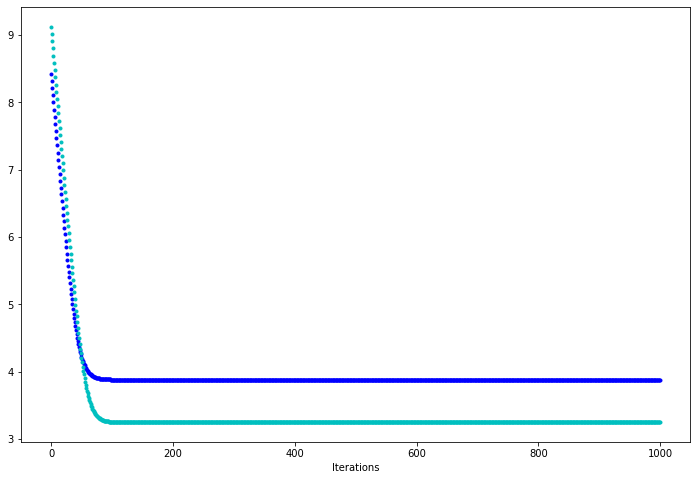

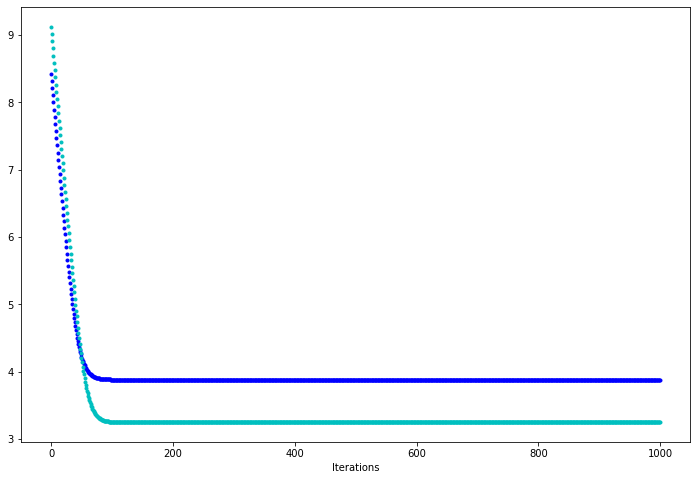

In [21]:
# 1. 
fig,ax = plt.subplots(figsize=(12,8))
#ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(iterations), cost_history ,'b.')
ax.plot(range(iterations), cost_history3,'c.')
#ax.plot(range(iterations), cost_history2,'g.')
plt.show()

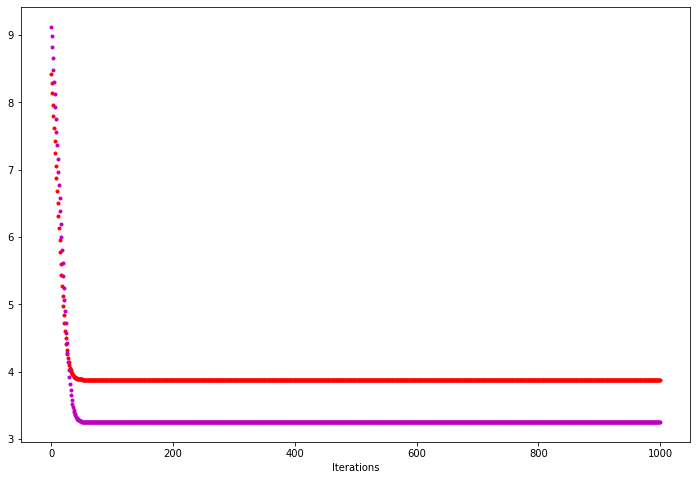

In [22]:
# 2. a
fig,ax = plt.subplots(figsize=(12,8))
#ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(iterations), cost_history1,'r.',label="Ridge- Nesterov")
ax.plot(range(iterations), cost_history4,'m.',label="LASSO- Nesterov")
#ax.plot(range(iterations), cost_history2,'g.')
plt.show()

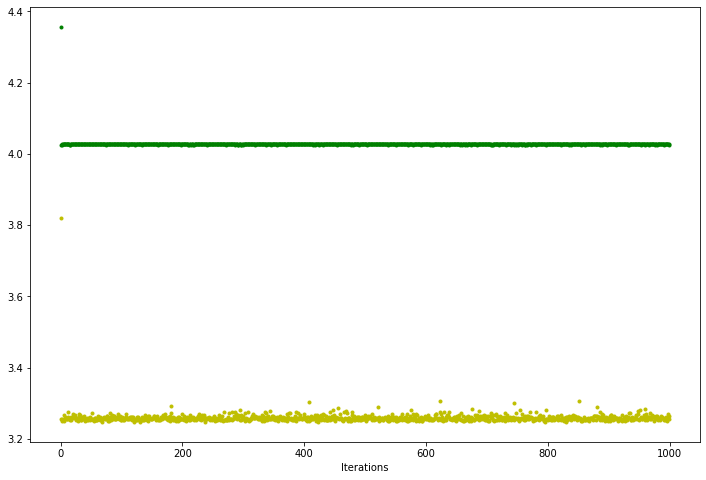

In [23]:
# 2. b
fig,ax = plt.subplots(figsize=(12,8))
#ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')
ax.plot(range(iterations), cost_history2,'g.',label="Ridge- Mini Batch")
ax.plot(range(iterations), cost_history5,'y.',label="LASSO- Mini Batch")
#ax.plot(range(iterations), cost_history2,'g.')
plt.show()

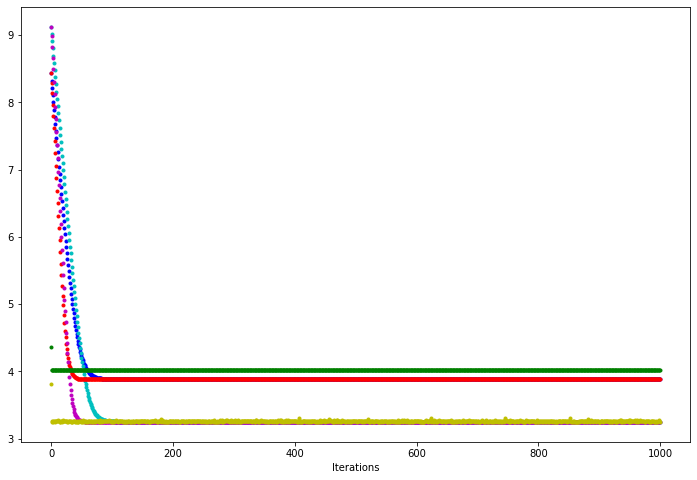

In [24]:
# All
fig,ax = plt.subplots(figsize=(12,8))
#ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')

ax.plot(range(iterations), cost_history ,'b.')
ax.plot(range(iterations), cost_history3,'c.')
ax.plot(range(iterations), cost_history1,'r.',label="Ridge- Nesterov")
ax.plot(range(iterations), cost_history4,'m.',label="LASSO- Nesterov")
ax.plot(range(iterations), cost_history2,'g.',label="Ridge- Mini Batch")
ax.plot(range(iterations), cost_history5,'y.',label="LASSO- Mini Batch")
#ax.plot(range(iterations), cost_history2,'g.')
plt.show()

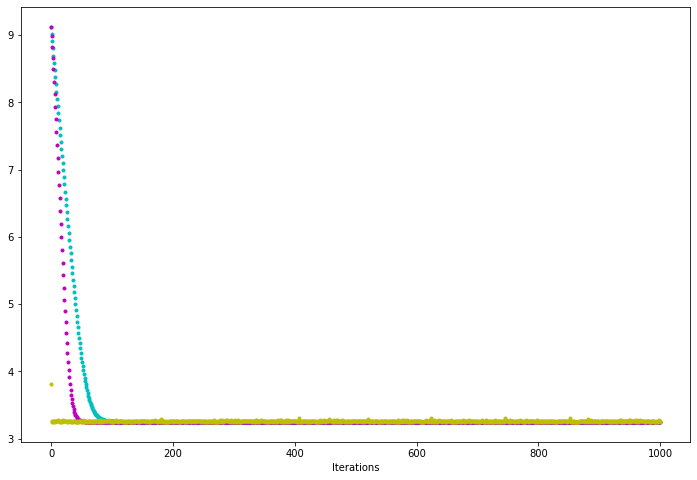

In [25]:
#Lasso
fig,ax = plt.subplots(figsize=(12,8))
#ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')

#ax.plot(range(iterations), cost_history ,'b.',label="Ridge- Batch")
ax.plot(range(iterations), cost_history3,'c.',label="LASSO- Batch")
#ax.plot(range(iterations), cost_history1,'r.',label="Ridge- Nesterov")
ax.plot(range(iterations), cost_history4,'m.',label="LASSO- Nesterov")
#ax.plot(range(iterations), cost_history2,'g.',label="Ridge- Mini Batch")
ax.plot(range(iterations), cost_history5,'y.',label="LASSO- Mini Batch")
#ax.plot(range(iterations), cost_history2,'g.')
plt.show()

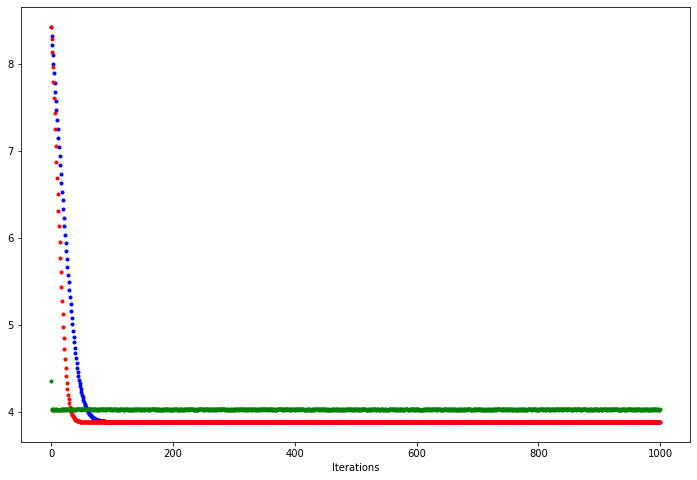

In [26]:
# Ridge
fig,ax = plt.subplots(figsize=(12,8))
#ax.set_ylabel('J(Theta)')
ax.set_xlabel('Iterations')

ax.plot(range(iterations), cost_history ,'b.',label="Ridge- Batch")
#ax.plot(range(iterations), cost_history3,'c.',label="LASSO- Batch")
ax.plot(range(iterations), cost_history1,'r.',label="Ridge- Nesterov")
#ax.plot(range(iterations), cost_history4,'m.',label="LASSO- Nesterov")
ax.plot(range(iterations), cost_history2,'g.',label="Ridge- Mini Batch")
#ax.plot(range(iterations), cost_history5,'y.',label="LASSO- Mini Batch")
#ax.plot(range(iterations), cost_history2,'g.')
plt.show()